<a href="https://colab.research.google.com/github/Thejasmayur31/TASK-3_ELEVATELAB_INTERN/blob/main/TASK_3B_MULTIPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('/content/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [4]:
df = df[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'availability_365', 'price']]

In [5]:
df=df[df['price']<=500]

In [6]:
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)  # one hot encoding

In [7]:
X = df.drop('price', axis=1)
y = df['price']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)



In [9]:
# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



MAE: 44.23113439619298
MSE: 4269.4449096572325
R² Score: 0.3974673005138385


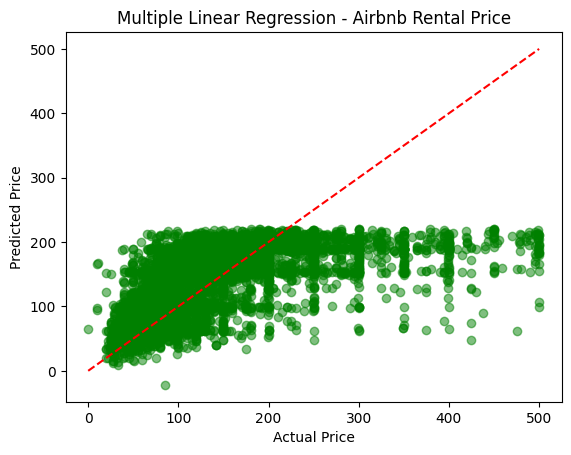

In [12]:
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression - Airbnb Rental Price")
plt.show()



In [11]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df.sort_values(by='Coefficient', ascending=False))

                                   Coefficient
neighbourhood_group_Manhattan        61.301565
neighbourhood_group_Brooklyn         25.457563
neighbourhood_group_Queens           10.967193
availability_365                      0.084287
number_of_reviews                    -0.075998
minimum_nights                       -0.277376
neighbourhood_group_Staten Island    -7.241955
room_type_Private room              -90.619387
room_type_Shared room              -118.775288
